<a href="https://colab.research.google.com/github/maurilanzo/Data-Science-Lab/blob/main/ds-labs/lab4/lab04_ds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt


# Wine classification

In [ ]:
from sklearn.datasets import load_wine
dataset = load_wine ()
X = dataset[ "data" ]
y = dataset[ "target" ]
feature_names= dataset["feature_names"]
wine = pd.DataFrame(X,columns=feature_names)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X,y)

DecisionTreeClassifier()

Tree plot

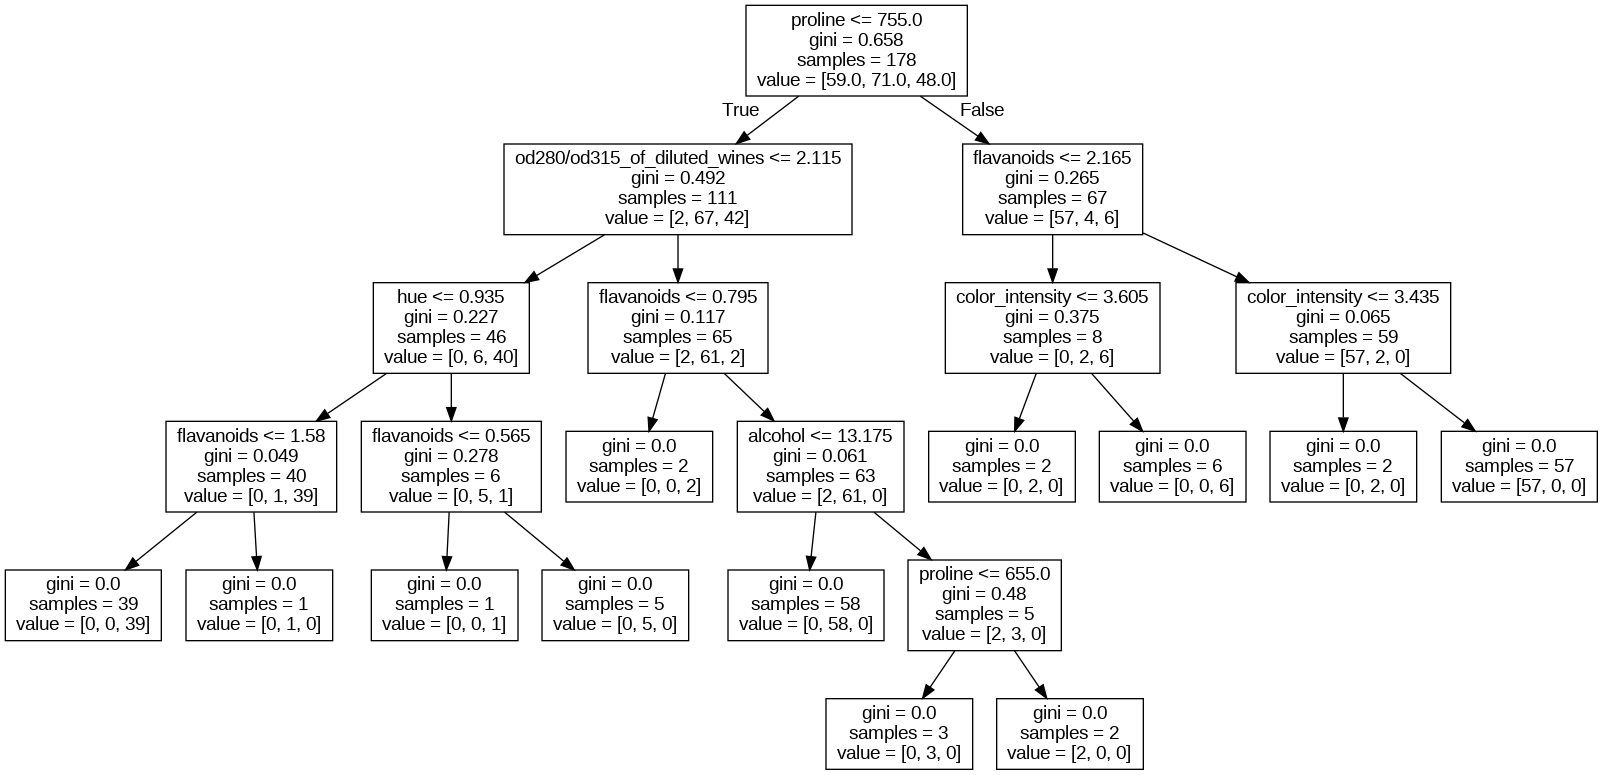

In [ ]:
import pydot
from IPython . display import Image
from sklearn . tree import export_graphviz
# here , features is a list of names , one for each feature
# this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz ( clf , feature_names = feature_names )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

In [ ]:
from  sklearn.metrics import accuracy_score,classification_report
y_pred = clf.predict(X)
accuracy = accuracy_score(y,y_pred)
print(accuracy)
#ofc accuracy is 1.0 because the test dataset is contained in the train so the model already saw everything

1.0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy*100 ,"%")
print(classification_report(y_test,y_pred))

86.01398601398601 %
              precision    recall  f1-score   support

           0       0.84      0.96      0.90        50
           1       0.89      0.76      0.82        55
           2       0.85      0.87      0.86        38

    accuracy                           0.86       143
   macro avg       0.86      0.86      0.86       143
weighted avg       0.86      0.86      0.86       143



Best parameter choice

In [ ]:
def parameters_testing(config):
  clf = DecisionTreeClassifier(**config)
  X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.8)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy


In [ ]:
from sklearn.model_selection import ParameterGrid
def best_parameters():
  params = {
  "max_depth" : [ None , 2 , 4 , 8] ,
  "splitter" : [ "best" , "random" ]
  }
  best = 0
  for config in ParameterGrid ( params ) :
    accuracy = parameters_testing(config)
    print(f"Max depth: {config["max_depth"]}, Splitter: {config["splitter"]}. Accuracy: \t{accuracy}" )
    if accuracy > best :
      best = accuracy
      best_config = config
  return best_config

In [ ]:
print(f"\nBest parameters: {best_parameters()}")

Max depth: None, Splitter: best. Accuracy: 	0.8601398601398601
Max depth: None, Splitter: random. Accuracy: 	0.7692307692307693
Max depth: 2, Splitter: best. Accuracy: 	0.8811188811188811
Max depth: 2, Splitter: random. Accuracy: 	0.8461538461538461
Max depth: 4, Splitter: best. Accuracy: 	0.8181818181818182
Max depth: 4, Splitter: random. Accuracy: 	0.8531468531468531
Max depth: 8, Splitter: best. Accuracy: 	0.8601398601398601
Max depth: 8, Splitter: random. Accuracy: 	0.8811188811188811

Best parameters: {'max_depth': 2, 'splitter': 'best'}


K-fold Cross-validation

In [ ]:
def parameters_testing(config,X_train , X_test , y_train , y_test):
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [ ]:
from sklearn.model_selection import ParameterGrid
def best_parameters(X_train , X_test , y_train , y_test):
  params = {
  "max_depth" : [ None , 2 , 4 , 8] ,
  "splitter" : [ "best" , "random" ]
  }
  best = 0
  for config in ParameterGrid ( params ) :
    accuracy = parameters_testing(config,X_train , X_test , y_train , y_test)
    print(f"Max depth: {config["max_depth"]}, Splitter: {config["splitter"]}. Accuracy: \t{accuracy}" )
    if accuracy > best :
      best_accuracy = accuracy
      best_config = config
  return best_config,best_accuracy

In [ ]:
from sklearn.model_selection import KFold
# Split the datasets into two :
# - X_train_valid : the dataset used for the k - fold cross - validation
# - X_test : the dataset used for the final testing ( this will NOT
# be seen by the classifier during the training / validation phases )
X_train_valid , X_test , y_train_valid , y_test = train_test_split (X,y,test_size=0.8)
kf = KFold (5) # 5 - fold cross - validation
# X and y are the arrays to be split
for train_indices , validation_indices in kf.split ( X_train_valid ) :
  X_train = X_train_valid [ train_indices ]
  X_valid = X_train_valid [ validation_indices ]
  y_train = y_train_valid [ train_indices ]
  y_valid = y_train_valid [ validation_indices ]

  best_config,best_accuracy = best_parameters(X_train,X_valid,y_train,y_valid)
  if best_accuracy > accuracy :
    accuracy = best_accuracy
    best_config = best_config
    best_split = [train_indices , validation_indices]

print(f"\nBest parameters: {best_config}")#how should i perform the testing after saving the best config?
print(f"Accuracy: {accuracy}")

clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid[best_split[0]],y_train_valid[best_split[0]])
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)









Max depth: None, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: None, Splitter: random. Accuracy: 	0.8571428571428571
Max depth: 2, Splitter: best. Accuracy: 	0.42857142857142855
Max depth: 2, Splitter: random. Accuracy: 	0.5714285714285714
Max depth: 4, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: 4, Splitter: random. Accuracy: 	1.0
Max depth: 8, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: 8, Splitter: random. Accuracy: 	0.5714285714285714
Max depth: None, Splitter: best. Accuracy: 	1.0
Max depth: None, Splitter: random. Accuracy: 	1.0
Max depth: 2, Splitter: best. Accuracy: 	1.0
Max depth: 2, Splitter: random. Accuracy: 	0.7142857142857143
Max depth: 4, Splitter: best. Accuracy: 	1.0
Max depth: 4, Splitter: random. Accuracy: 	1.0
Max depth: 8, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: 8, Splitter: random. Accuracy: 	0.7142857142857143
Max depth: None, Splitter: best. Accuracy: 	0.8571428571428571
Max depth: None, Splitter: random. Acc

# 2.2: Synthetic dataset


In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2d-synthetic.csv")
X = df[["x0","x1"]]
y = df["label"]
print(y)

0      0
1      0
2      1
3      1
4      0
      ..
495    0
496    0
497    0
498    1
499    1
Name: label, Length: 500, dtype: int64


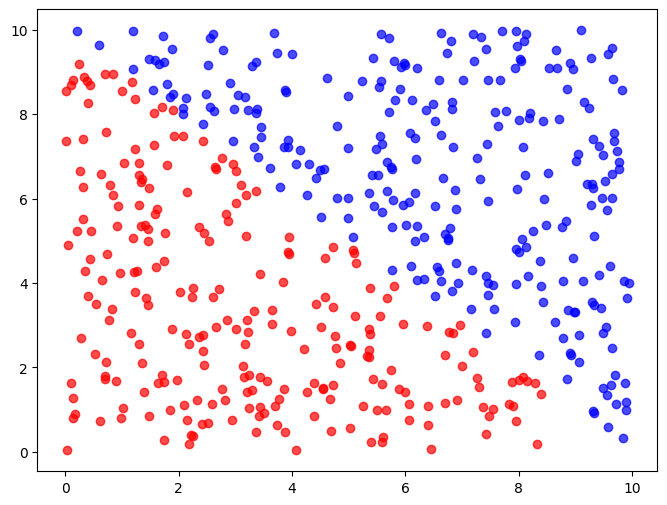

In [ ]:
class_0 = df[df['label'] == 0]
class_1 = df[df['label'] == 1]

plt.figure(figsize=(8, 6))
plt.scatter(class_0['x0'], class_0['x1'], color='blue', label='Class 0', alpha=0.7)
plt.scatter(class_1['x0'], class_1['x1'], color='red', label='Class 1', alpha=0.7)

In [ ]:
from  sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
def parameters_testing(config,X_train , X_test , y_train , y_test):
  clf = DecisionTreeClassifier(**config)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [ ]:
from sklearn.model_selection import ParameterGrid
def best_parameters(X_train , X_test , y_train , y_test):
  params = {
  "max_depth" : [ None , 2 , 4 , 8] ,
  "splitter" : [ "best" , "random" ]
  }
  best = 0
  for config in ParameterGrid ( params ) :
    accuracy = parameters_testing(config,X_train , X_test , y_train , y_test)
    print(f"Max depth: {config['max_depth']}, Splitter: {config["splitter"]}. Accuracy: \t{accuracy}" )
    if accuracy > best :
      best = accuracy
      best_config = config
  print()
  return best_config,best

In [ ]:
from sklearn.model_selection import KFold
# Split the datasets into two :
# - X_train_valid : the dataset used for the k - fold cross - validation
# - X_test : the dataset used for the final testing ( this will NOT
# be seen by the classifier during the training / validation phases )
X_train_valid , X_test , y_train_valid , y_test = train_test_split (X,y,test_size=0.8)
kf = KFold (5) # 5 - fold cross - validation
# X and y are the arrays to be split
best_accuracy = 0
for train_indices , validation_indices in kf.split ( X_train_valid ) :
  X_train = X_train_valid.iloc[train_indices]
  X_valid = X_train_valid.iloc[validation_indices]
  y_train = y_train_valid.iloc[train_indices]
  y_valid = y_train_valid.iloc[validation_indices]

  config,accuracy = best_parameters(X_train,X_valid,y_train,y_valid)
  if accuracy > best_accuracy :
    best_accuracy = accuracy
    best_config = config
    best_split = [train_indices , validation_indices]

print(f"\nBest parameters: {best_config}")
print(f"Accuracy: {best_accuracy}")

clf = DecisionTreeClassifier(**best_config)
clf.fit(X_train_valid.iloc[best_split[0]],y_train_valid.iloc[best_split[0]])
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print("final accuracy: ",accuracy)



Max depth: None, Splitter: best. Accuracy: 	1.0
Max depth: None, Splitter: random. Accuracy: 	1.0
Max depth: 2, Splitter: best. Accuracy: 	0.85
Max depth: 2, Splitter: random. Accuracy: 	0.8
Max depth: 4, Splitter: best. Accuracy: 	1.0
Max depth: 4, Splitter: random. Accuracy: 	0.85
Max depth: 8, Splitter: best. Accuracy: 	1.0
Max depth: 8, Splitter: random. Accuracy: 	0.9

Max depth: None, Splitter: best. Accuracy: 	0.8
Max depth: None, Splitter: random. Accuracy: 	0.95
Max depth: 2, Splitter: best. Accuracy: 	0.8
Max depth: 2, Splitter: random. Accuracy: 	0.85
Max depth: 4, Splitter: best. Accuracy: 	1.0
Max depth: 4, Splitter: random. Accuracy: 	1.0
Max depth: 8, Splitter: best. Accuracy: 	0.8
Max depth: 8, Splitter: random. Accuracy: 	0.9

Max depth: None, Splitter: best. Accuracy: 	0.85
Max depth: None, Splitter: random. Accuracy: 	0.9
Max depth: 2, Splitter: best. Accuracy: 	0.8
Max depth: 2, Splitter: random. Accuracy: 	0.8
Max depth: 4, Splitter: best. Accuracy: 	0.85
Max depth

Try with the entire dataset

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

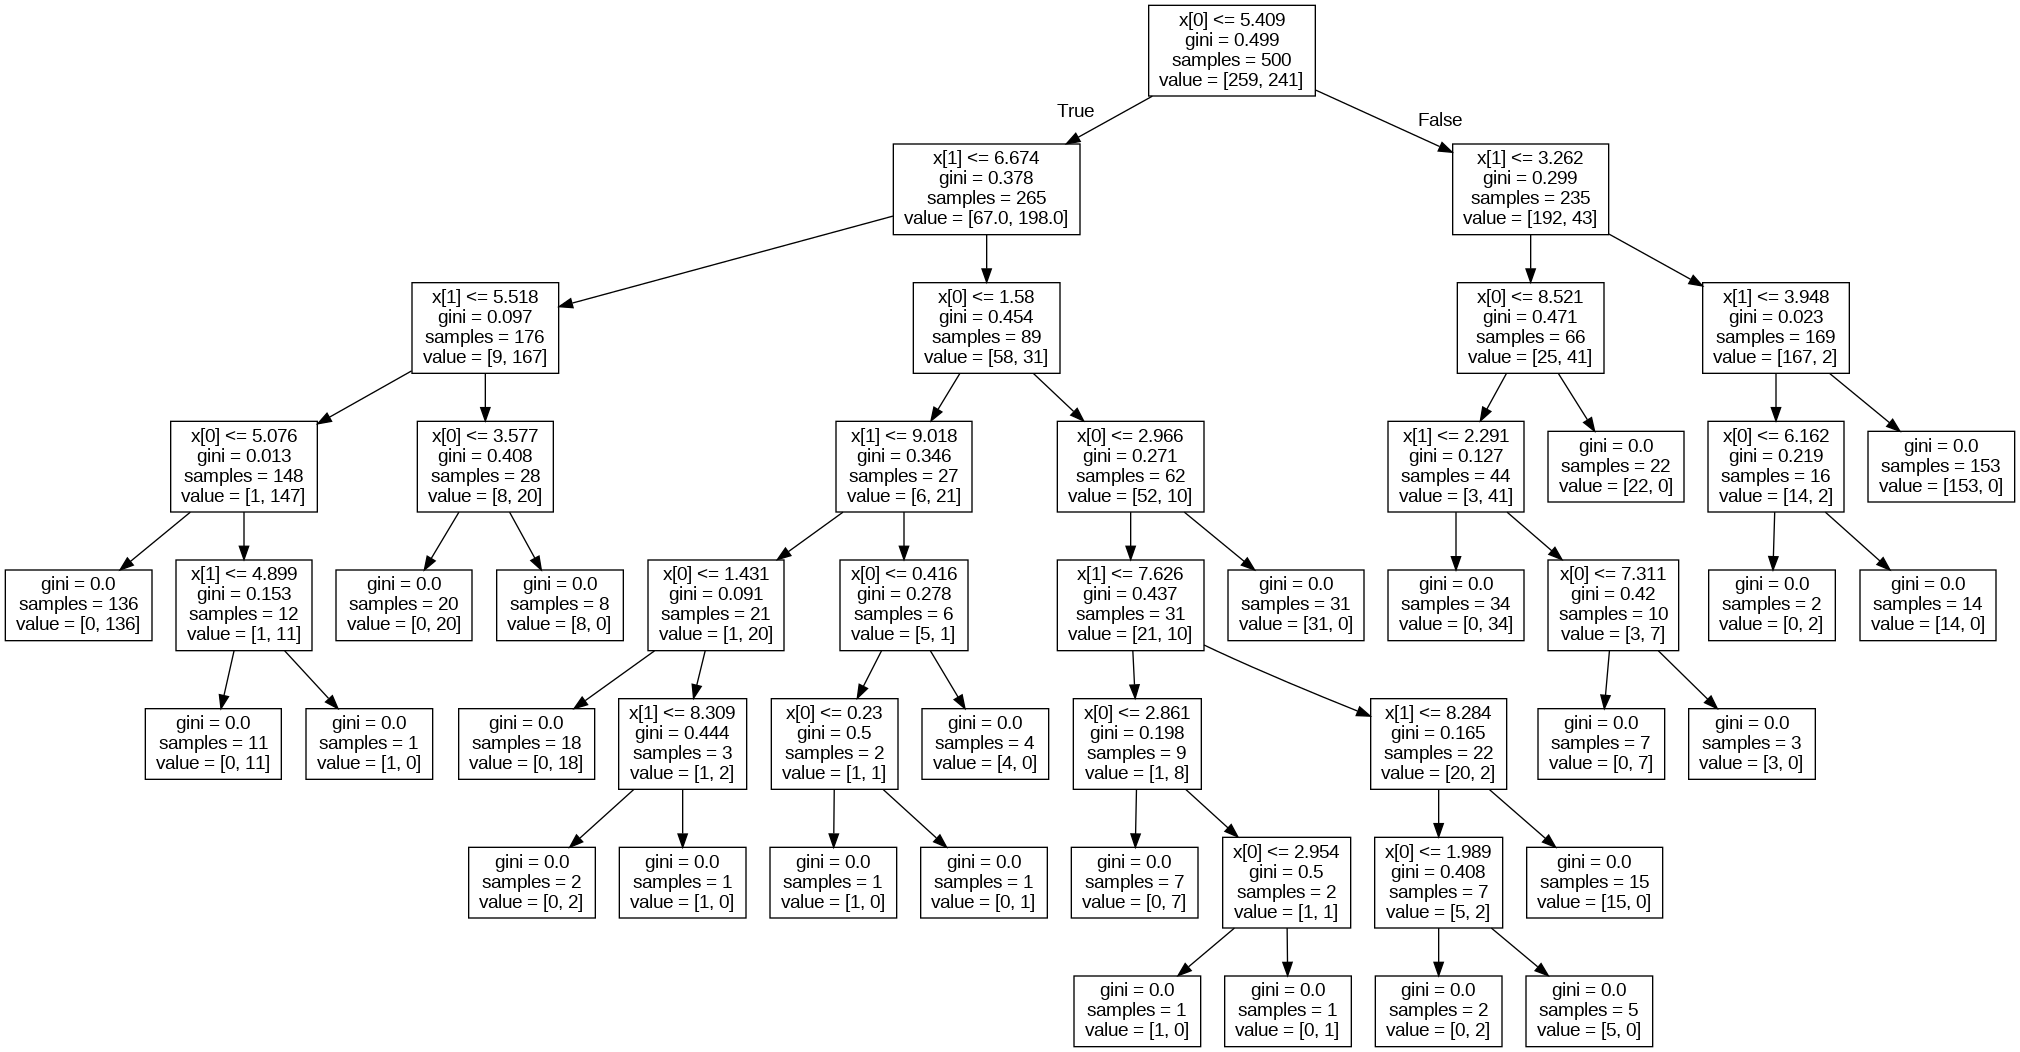

In [ ]:
import pydot
from IPython . display import Image
from sklearn . tree import export_graphviz
# here , features is a list of names , one for each feature
# this makes the resulting tree visualization more comprehensible
dot_code = export_graphviz ( clf )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

From the plot we can understand that if we sum the features we can have easier classification

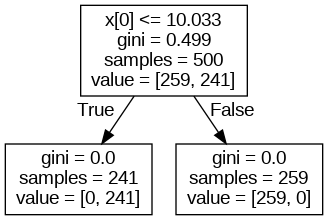

In [ ]:
X_ = X['x0']+X["x1"]

clf = DecisionTreeClassifier()
clf.fit(pd.DataFrame(X_), y)
dot_code = export_graphviz ( clf )
graph = pydot.graph_from_dot_data(dot_code)
Image(graph[0].create_png())

# 2.3 Random forest

In [2]:
from  sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.datasets import fetch_openml
dataset = fetch_openml ( "mnist_784" )
X = dataset [ "data" ]
y = dataset [ "target" ]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=6/7,shuffle=True)


In [4]:
clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(accuracy)

0.8032


## 2.3.3 Random forest

In [17]:
from scipy.stats import mode
class MyRandomForestClassifier () :
  def __init__ ( self , n_estimators , max_features ) :
    self.n_estimators =  n_estimators
    self.max_features = max_features

  # train the trees of this random forest using subsets of X ( and y )
  def fit ( self , X_train , y_train ) : #these are already X train and y_train


    self.trees = []
    self.features_list = []

    for i in range(self.n_estimators):
      tree = DecisionTreeClassifier()
      indices = np.random.choice(len(X_train), len(X_train), replace=True)

      n_feats = int(np.round(np.sqrt(self.max_features)))
      features = np.random.choice(range(self.max_features), n_feats, replace=False) #take sqrt(maxfeatures) features from 0 to max_feat
      self.features_list.append(features)

      tree.fit(X_train.iloc[indices,features].to_numpy(),y_train.iloc[indices].to_numpy())
      self.trees.append(tree)

  def majority_voting (self,predictions):
      most_common = pd.DataFrame.mode(pd.DataFrame(predictions), axis=1)[0]
      return most_common



  # predict the label for each point in X
  def predict ( self , X_test ) :
    predictions = np.zeros((len(X_test),self.n_estimators))
    for i, tree in enumerate(self.trees):
        features = self.features_list[i]
        prediction = (tree.predict(X_test.iloc[:, features].to_numpy()))
        predictions[:, i] = prediction


   # predictions = self.majority_voting(predictions)
    return mode(predictions, axis=1, keepdims=False).mode.astype(int)




In [15]:
from  sklearn.metrics import accuracy_score,classification_report
estimators = 100
max_features = int(X_train.shape[1])
rf = MyRandomForestClassifier(estimators, max_features)
rf.fit(X_train,y_train.astype(int))
pred = (rf.predict(X_test))
print(accuracy_score(y_test.astype(int),pred))

0.9244666666666667


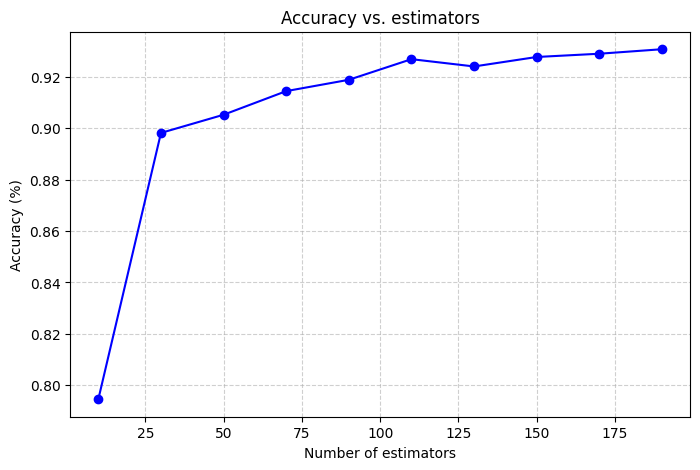

In [10]:
max_features = int(X_train.shape[1])
accuracies = []
est_min = 10
est_max = 200
estimator_list = range(est_min,est_max+10,20)
for est in estimators:
  rf = MyRandomForestClassifier(est, max_features)
  rf.fit(X_train,y_train.astype(int))
  pred= rf.predict(X_test)
  accuracies.append(accuracy_score(y_test.astype(int),pred))

plt.figure(figsize=(8, 5))
plt.plot(estimator_list, accuracies, marker='o', linestyle='-', color='b')
plt.title(f"Accuracy vs. estimators")
plt.xlabel("Number of estimators")
plt.ylabel("Accuracy (%)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


A good option is around 110 estimators

Try the sklearn random forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
estimators = 110
#sklearn random forest
srf = RandomForestClassifier()
srf.fit(X_train,y_train)
sk_pred = srf.predict(X_test)
sk_accuracy = accuracy_score(y_test,sk_pred)

#my random forest
rf = MyRandomForestClassifier(estimators, max_features)
rf.fit(X_train,y_train.astype(int))
my_pred = (rf.predict(X_test))
my_accuracy = accuracy_score(y_test.astype(int),my_pred)

print(f"Sk-learn random forest accuracy: \t{sk_accuracy} \n my random forest accuracy: \t{my_accuracy}")


Sk-learn random forest accuracy: 	0.9497166666666667 
 my random forest accuracy: 	0.9250166666666667
